## Regularyzacja

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from network import NN
from activation_functions import *
from metrics import *
from prepare_data import read_classification_data, read_regression_data
os.chdir('..')

In [2]:
def cv_network(seeds=[123, 1, 2, 23, 42], build_args=None, fit_args=None):
    scores_test = []
    scores_train = []
    nns  = []
    for s in seeds:
        nn = NN(**build_args, seed=s)
        last_fa = None
        for fa in fit_args:
            nn.fit(**fa)
            last_fa = fa
        nns.append(nn)
        scores_test.append(last_fa['metric'](last_fa['y_test'], nn.predict(last_fa['x_test'])))
        scores_train.append(last_fa['metric'](last_fa['y_train'], nn.predict(last_fa['x_train'])))

    return scores_train, scores_test, nns

In [3]:
df_results = pd.DataFrame(columns=['no. cv', 'metric', 'mean metric train', 'mean metric test'])

In [4]:
ms_x_train, ms_y_train, ms_x_test, ms_y_test = read_regression_data('multimodal-sparse', index_col=None)

## Bez regularyzacji

In [5]:
ms_no_reg_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_no_reg_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test = cv_network(build_args=ms_no_reg_build, fit_args=ms_no_reg_fit)
print(np.mean(results_train), np.mean(results_test))

Epoch number 10/700
Loss on training set: 2222.1382946641365, loss on test set: 2192.269161391641
Epoch number 20/700
Loss on training set: 3347.360247821107, loss on test set: 4439.912121278672
Epoch number 30/700
Loss on training set: 1467.4589243551031, loss on test set: 1564.1447173518623
Epoch number 40/700
Loss on training set: 1085.7517904636593, loss on test set: 1528.3619337427708
Epoch number 50/700
Loss on training set: 1644.954637368966, loss on test set: 1729.4080471606558
Epoch number 60/700
Loss on training set: 1288.832914576759, loss on test set: 1874.65933286635
Epoch number 70/700
Loss on training set: 1143.3702671785911, loss on test set: 1690.4639784213962
Epoch number 80/700
Loss on training set: 580.1899504025191, loss on test set: 885.422085420701
Epoch number 90/700
Loss on training set: 1515.5621906134934, loss on test set: 2139.1367138469145
Epoch number 100/700
Loss on training set: 1830.8758093233114, loss on test set: 1119.1301014124722
Epoch number 110/70

KeyboardInterrupt: 

In [ ]:
df_results.loc['multimodal-sparse-no-reg'] = [5, 'mse', np.mean(results_train), np.mean(results_test)]

In [ ]:
df_results

## Regularyzacja L2

In [ ]:
ms_l2_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_l2_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.01},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.01},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.01}]
results_train, results_test = cv_network(build_args=ms_l2_build, fit_args=ms_l2_fit)
print(np.mean(results_train), np.mean(results_test))

In [ ]:
results_test

In [ ]:
df_results.loc['multimodal-sparse-l2-0.01'] = [5, 'mse', round(32.016365343609294, 2), round(122.56518404311655, 2)]

In [ ]:
df_results

In [ ]:
ms_l2_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_l2_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.01},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.01},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.01}]
results_train, results_test = cv_network(build_args=ms_l2_build, fit_args=ms_l2_fit)
print(np.mean(results_train), np.mean(results_test))

In [ ]:
print(np.mean(results_train), np.mean(results_test))

In [ ]:
print(np.mean(results_train), np.mean(results_test))

In [ ]:
ms_l2_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_l2_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.1},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.1},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0.1}]
results_train, results_test = cv_network(build_args=ms_l2_build, fit_args=ms_l2_fit)
print(np.mean(results_train, results_test))

In [ ]:
ms_l2_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_l2_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 2},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 2},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 500, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 2},
             {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 2}]
results_train, results_test = cv_network(build_args=ms_l2_build, fit_args=ms_l2_fit)
print(np.mean(results_train), np.mean(results_test))

In [ ]:
print(np.mean(results_train), np.mean(results_test))

## Zbiór rings5-sparse

In [3]:
r5_x_train, r5_y_train, r5_x_test, r5_y_test = read_classification_data('rings5-sparse')

### No regularization

In [5]:
r5_no_reg_build = {'input_shape': r5_x_train.shape, 'neurons_num': [40, 40, 5], 'activations': [ReLU(), ReLU(), Softmax()]}
r5_no_reg_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 800, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0},
                 {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 400, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0}]
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test, r5_no_reg_nns = cv_network(build_args=r5_no_reg_build, fit_args=r5_no_reg_fit)

C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(


Epoch number 10/800
Loss on training set: 1.9261082659796391 f_score on training set: 0.3727711855338207, loss on test set: 2.5628407785513345 f_score on test set: 0.3181552248403368
Epoch number 20/800
Loss on training set: 1.2221577764185154 f_score on training set: 0.5115000000000001, loss on test set: 1.8229922850691644 f_score on test set: 0.3956216420906755
Epoch number 30/800
Loss on training set: 1.5761421875636976 f_score on training set: 0.44269195425205654, loss on test set: 2.0530622759569277 f_score on test set: 0.38752793111203576
Epoch number 40/800
Loss on training set: 1.3409371959500316 f_score on training set: 0.49179621054621053, loss on test set: 2.0961867818776994 f_score on test set: 0.37244297567564594
Epoch number 50/800
Loss on training set: 1.2465652142745771 f_score on training set: 0.42170140060429373, loss on test set: 1.955733974903992 f_score on test set: 0.34164350675329574
Epoch number 60/800
Loss on training set: 1.1655248708676107 f_score on training

In [6]:
print(np.mean(results_train), np.mean(results_test))

0.8109249100349232 0.5021059057537205


In [76]:
def average_loss(nns):
    n = len(nns) - 1
    sum_loss_train = np.array(nns[1].history['loss_train'])
    sum_loss_test = np.array(nns[1].history['loss_test'])
    for i in range(2, len(nns)):
        sum_loss_train = np.add(sum_loss_train, np.array(nns[i].history['loss_train']))
        sum_loss_test = np.add(sum_loss_test, np.array(nns[i].history['loss_test']))
    return sum_loss_train / n, sum_loss_test / n

In [27]:
sum_loss_train = np.array(r5_no_reg_nns[1].history['loss_train'])
sum_loss_test = np.array(r5_no_reg_nns[1].history['loss_test'])
for i in range(2, 5):
    sum_loss_train = np.add(sum_loss_train, np.array(r5_no_reg_nns[i].history['loss_train']))
    sum_loss_test = np.add(sum_loss_test, np.array(r5_no_reg_nns[i].history['loss_test']))

In [23]:
len(sum_loss_train)

1200

In [36]:
avg_loss_r5_no_reg = average_loss(r5_no_reg_nns)
avg_loss_r5_l2 = average_loss(r5_l2_nns)

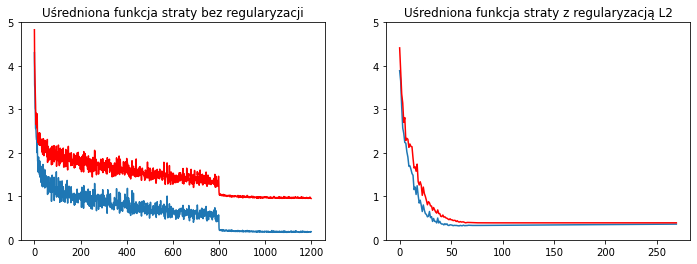

In [41]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(np.arange(1200), avg_loss_r5_no_reg[0])
plt.ylim(0, 5)
plt.title('Uśredniona funkcja straty bez regularyzacji')
plt.plot(np.arange(1200), avg_loss_r5_no_reg[1], c='red')
plt.subplot(1, 2, 2)
plt.plot(np.arange(270), avg_loss_r5_l2[0])
plt.ylim(0, 5)
plt.title('Uśredniona funkcja straty z regularyzacją L2')
plt.plot(np.arange(270), avg_loss_r5_l2[1], c='red')
plt.show()

In [ ]:
print(np.mean(results_train), np.mean(results_test))

In [ ]:
results_train

In [ ]:
r5_l2_build = {'input_shape': r5_x_train.shape, 'neurons_num': [40, 40, 5], 'activations': [ReLU(), ReLU(), Softmax()]}
r5_l2_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 800, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0.1},
                 {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 400, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0.1}]
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test = cv_network(build_args=r5_l2_build, fit_args=r5_l2_fit)

In [ ]:
print(np.mean(results_train), np.mean(results_test))

In [26]:
r5_l2_build = {'input_shape': r5_x_train.shape, 'neurons_num': [40, 40, 5], 'activations': [ReLU(), ReLU(), Softmax()]}
r5_l2_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 70, 'learning_rate': 0.0001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 3},
             {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 200, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 3}]
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 400, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 1}]
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 # {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test, r5_l2_nns = cv_network(build_args=r5_l2_build, fit_args=r5_l2_fit)

Epoch number 10/70
Loss on training set: 1.6241255570698956 f_score on training set: 0.36836806747498085, loss on test set: 2.009509933282919 f_score on test set: 0.3144414344798424
Epoch number 20/70
Loss on training set: 0.7417570005821565 f_score on training set: 0.4763483665943171, loss on test set: 1.058472179391965 f_score on test set: 0.381883067062043
Epoch number 30/70
Loss on training set: 0.5443219182930841 f_score on training set: 0.4916899154308436, loss on test set: 0.7626522253325697 f_score on test set: 0.42544298323462953
Epoch number 40/70
Loss on training set: 0.40817020338236754 f_score on training set: 0.48223407168640436, loss on test set: 0.5714530161097913 f_score on test set: 0.36179913651470763
Epoch number 50/70
Loss on training set: 0.33919715451711846 f_score on training set: 0.48005407546266576, loss on test set: 0.45888246748233413 f_score on test set: 0.3850065612773246
Epoch number 60/70
Loss on training set: 0.32218682344544025 f_score on training set:

In [ ]:
print(np.mean(results_train), np.mean(results_test))
# reg 2

In [ ]:
print(np.mean(results_train), np.mean(results_test)) # reg 1

In [ ]:
print(np.mean(results_train), np.mean(results_test)) # reg 2

## Rings3

In [46]:
xor3_x_train, xor3_y_train, xor3_x_test, xor3_y_test = read_classification_data('xor3-balance')

In [47]:
xor3_x_train.shape

(1050, 2)

In [63]:
xor3_no_reg_build = {'input_shape': xor3_x_train.shape, 'neurons_num': [40, 40, 2], 'activations': [ReLU(), ReLU(), Softmax()]}
xor3_no_reg_fit = [{'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 200, 'learning_rate': 0.0001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0},
                 {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 100, 'learning_rate': 0.00001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0}]
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test, xor3_no_reg_nns = cv_network(build_args=xor3_no_reg_build, fit_args=xor3_no_reg_fit)

Epoch number 10/200
Loss on training set: 0.4163152452142537 f_score on training set: 0.9320206020713635, loss on test set: 3.810485247519712 f_score on test set: 0.6195315323321189
Epoch number 20/200
Loss on training set: 0.44067042076256707 f_score on training set: 0.9487508785762785, loss on test set: 5.44519749267293 f_score on test set: 0.550974769544831
Epoch number 30/200
Loss on training set: 0.3421899378400168 f_score on training set: 0.9352515164415869, loss on test set: 4.168717915822777 f_score on test set: 0.5452163191019354
Epoch number 40/200
Loss on training set: 0.2630368688938292 f_score on training set: 0.9359160929619332, loss on test set: 2.674186801561012 f_score on test set: 0.6573405211876977
Epoch number 50/200
Loss on training set: 0.25582579426987984 f_score on training set: 0.9478652574755082, loss on test set: 3.4501145633232784 f_score on test set: 0.6360891148113729
Epoch number 60/200
Loss on training set: 0.2939445190209044 f_score on training set: 0.9

C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 10/200
Loss on training set: nan f_score on training set: 0.9473675860482457, loss on test set: nan f_score on test set: 0.5880112992521125


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 20/200
Loss on training set: nan f_score on training set: 0.9397119622007177, loss on test set: nan f_score on test set: 0.5811782247960414


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 30/200
Loss on training set: nan f_score on training set: 0.9320928460292763, loss on test set: nan f_score on test set: 0.4615156325156326


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 40/200
Loss on training set: nan f_score on training set: 0.917581912897427, loss on test set: nan f_score on test set: 0.7649128994866701


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 50/200
Loss on training set: nan f_score on training set: 0.9561201941077577, loss on test set: nan f_score on test set: 0.5800356534850917


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 60/200
Loss on training set: nan f_score on training set: 0.9483741483741485, loss on test set: nan f_score on test set: 0.5213607768582565


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 70/200
Loss on training set: nan f_score on training set: 0.9513051560765278, loss on test set: nan f_score on test set: 0.6091712650725526


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 80/200
Loss on training set: nan f_score on training set: 0.9615983026874114, loss on test set: nan f_score on test set: 0.5948995945573032


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 90/200
Loss on training set: nan f_score on training set: 0.9597180807806994, loss on test set: nan f_score on test set: 0.5968594092072401


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 100/200
Loss on training set: nan f_score on training set: 0.9584278155706727, loss on test set: nan f_score on test set: 0.5987779106858053


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 110/200
Loss on training set: nan f_score on training set: 0.9468482597654819, loss on test set: nan f_score on test set: 0.6316469771187505


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 120/200
Loss on training set: nan f_score on training set: 0.9321858124693176, loss on test set: nan f_score on test set: 0.7679649479117286


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 130/200
Loss on training set: nan f_score on training set: 0.9521213657876942, loss on test set: nan f_score on test set: 0.7354406403387324


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 140/200
Loss on training set: nan f_score on training set: 0.9477771859289726, loss on test set: nan f_score on test set: 0.4539736414515256


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 150/200
Loss on training set: nan f_score on training set: 0.923821036794271, loss on test set: nan f_score on test set: 0.7377366666666667


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 160/200
Loss on training set: nan f_score on training set: 0.9586206896551726, loss on test set: nan f_score on test set: 0.617250858449514


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 170/200
Loss on training set: nan f_score on training set: 0.9723691945914168, loss on test set: nan f_score on test set: 0.6617769420011583


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 180/200
Loss on training set: nan f_score on training set: 0.976689478186484, loss on test set: nan f_score on test set: 0.6887710906056028


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 190/200
Loss on training set: nan f_score on training set: 0.927392253075111, loss on test set: nan f_score on test set: 0.7758976084890721


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 200/200
Loss on training set: nan f_score on training set: 0.9420953388851793, loss on test set: nan f_score on test set: 0.7837440508326757


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 10/100
Loss on training set: nan f_score on training set: 0.9742108171867395, loss on test set: nan f_score on test set: 0.7333038264856288


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 20/100
Loss on training set: nan f_score on training set: 0.9722483635527113, loss on test set: nan f_score on test set: 0.7473673638189767


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 30/100
Loss on training set: nan f_score on training set: 0.9801278916928424, loss on test set: nan f_score on test set: 0.7142159331170613


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 40/100
Loss on training set: nan f_score on training set: 0.9785703273549515, loss on test set: nan f_score on test set: 0.7191053805886896


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 50/100
Loss on training set: nan f_score on training set: 0.9785703273549515, loss on test set: nan f_score on test set: 0.7130909846579386


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 60/100
Loss on training set: nan f_score on training set: 0.9774150162593848, loss on test set: nan f_score on test set: 0.7037798725077987


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 70/100
Loss on training set: nan f_score on training set: 0.9779357182342258, loss on test set: nan f_score on test set: 0.7216924126448211


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 80/100
Loss on training set: nan f_score on training set: 0.9785703273549515, loss on test set: nan f_score on test set: 0.7142159331170613


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 90/100
Loss on training set: nan f_score on training set: 0.98221969256728, loss on test set: nan f_score on test set: 0.6970802980027208


C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
 

Epoch number 100/100
Loss on training set: nan f_score on training set: 0.9779900814383572, loss on test set: nan f_score on test set: 0.7408134171907755
Epoch number 10/200
Loss on training set: 0.2844412581056593 f_score on training set: 0.9551544642020592, loss on test set: 2.8209645720172216 f_score on test set: 0.7115327102803738
Epoch number 20/200
Loss on training set: 0.2411719062290719 f_score on training set: 0.9427686889343332, loss on test set: 1.5548265534822678 f_score on test set: 0.8050513008064155
Epoch number 30/200
Loss on training set: 0.4124701579140883 f_score on training set: 0.9354195719677951, loss on test set: 2.71376576174977 f_score on test set: 0.7304149207971383
Epoch number 40/200
Loss on training set: 0.1503242952757255 f_score on training set: 0.9761946004800672, loss on test set: 2.2236107797870375 f_score on test set: 0.734008773217371
Epoch number 50/200
Loss on training set: 0.1615302470935897 f_score on training set: 0.9703344575908293, loss on tes

C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (np.sum(np.exp(x), axis=1).reshape(
C:\Users\marys\PycharmProjects\NN\activation_functions.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (np.sum(np.exp(x), 

Epoch number 10/200
Loss on training set: 0.4507386630756022 f_score on training set: 0.943206387943399, loss on test set: nan f_score on test set: 0.5559122212215923
Epoch number 20/200
Loss on training set: 0.26041418623086654 f_score on training set: 0.9597759594474082, loss on test set: 2.3973581161743938 f_score on test set: 0.7724061032863849
Epoch number 30/200
Loss on training set: 0.35551178493692764 f_score on training set: 0.9688197575660557, loss on test set: 4.889833747783084 f_score on test set: 0.6037381488578711
Epoch number 40/200
Loss on training set: 0.3227373649761177 f_score on training set: 0.9574250218981704, loss on test set: 2.9711317100003383 f_score on test set: 0.7286051164871303
Epoch number 50/200
Loss on training set: 0.29272626400259205 f_score on training set: 0.9623105841973417, loss on test set: 3.412006268935458 f_score on test set: 0.6820262120915246
Epoch number 60/200
Loss on training set: 0.33987439802175207 f_score on training set: 0.96230811742

In [70]:
for i in range(3, 5):
    print(i)

    assert ~np.isnan(np.array(xor3_no_reg_nns[i].history['loss_train'])).any()

3
4


AssertionError: 

In [77]:
avg_loss_xor3_train, avg_loss_xor3_test = average_loss([-1, xor3_no_reg_nns[0], xor3_no_reg_nns[1],  xor3_no_reg_nns[3]])

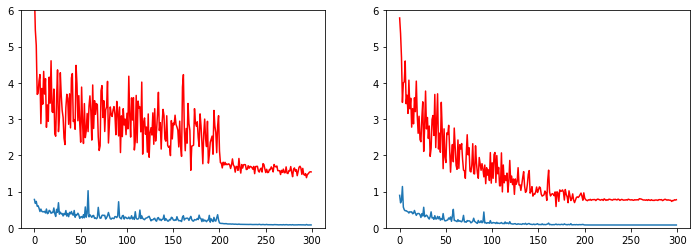

In [83]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(np.arange(300), avg_loss_xor3_train)
plt.ylim(0, 6)
plt.plot(np.arange(300), avg_loss_xor3_test, c='red')
plt.subplot(1, 2, 2)
plt.plot(np.arange(300), avg_loss_xor3_train_l2)
plt.ylim(0, 6)
plt.plot(np.arange(300), avg_loss_xor3_test_l2, c='red')

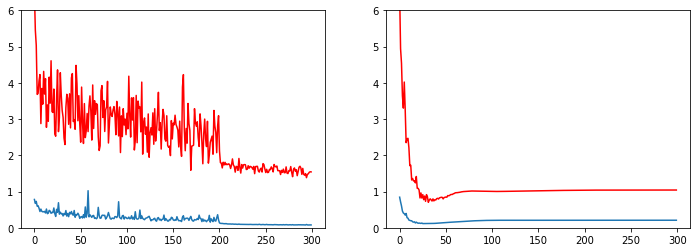

In [87]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(np.arange(300), avg_loss_xor3_train)
plt.ylim(0, 6)
plt.plot(np.arange(300), avg_loss_xor3_test, c='red')
plt.subplot(1, 2, 2)
plt.plot(np.arange(300), avg_loss_xor3_train_l2)
plt.ylim(0, 6)
plt.plot(np.arange(300), avg_loss_xor3_test_l2, c='red')

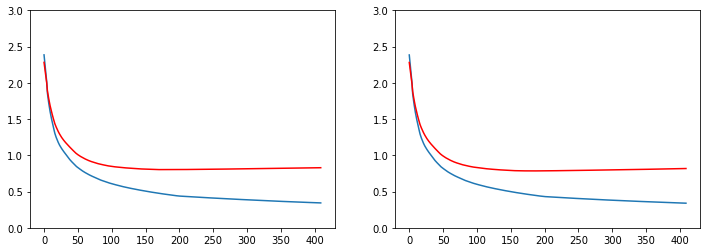

In [114]:
avg_loss_xor3_train_l2, avg_loss_xor3_test_l2 = average_loss(xor3_l2_nns)
avg_loss_xor3_train, avg_loss_xor3_test = average_loss(xor3_no_reg_nns)
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(np.arange(410), avg_loss_xor3_train)
plt.ylim(0, 3)
plt.plot(np.arange(410), avg_loss_xor3_test, c='red')
plt.subplot(1, 2, 2)
plt.plot(np.arange(410), avg_loss_xor3_train_l2)
plt.ylim(0, 3)
plt.plot(np.arange(410), avg_loss_xor3_test_l2, c='red')

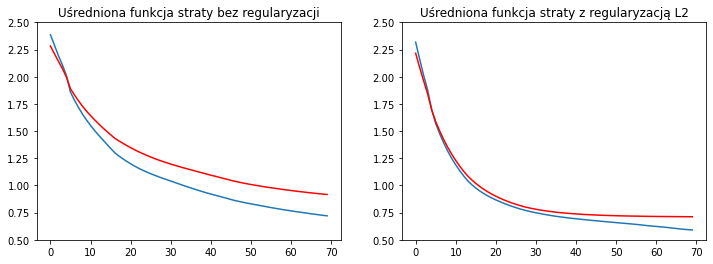

In [127]:
avg_loss_xor3_train_l2, avg_loss_xor3_test_l2 = average_loss(xor3_l2_nns)
avg_loss_xor3_train, avg_loss_xor3_test = average_loss(xor3_no_reg_nns)
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(np.arange(70), avg_loss_xor3_train)
plt.ylim(0.5, 2.5)
plt.plot(np.arange(70), avg_loss_xor3_test, c='red')
plt.title('Uśredniona funkcja straty bez regularyzacji')
plt.subplot(1, 2, 2)
plt.plot(np.arange(70), avg_loss_xor3_train_l2)
plt.ylim(0.5, 2.5)
plt.plot(np.arange(70), avg_loss_xor3_test_l2, c='red')
plt.title('Uśredniona funkcja straty z regularyzacją L2')
plt.show()

In [123]:
xor3_no_reg_build = {'input_shape': xor3_x_train.shape, 'neurons_num': [32, 2], 'activations': [Tanh(), Softmax()]}
xor3_no_reg_fit = [{'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 16, 'n_epochs': 70, 'learning_rate': 0.0001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0}]
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 16, 'n_epochs': 210, 'learning_rate': 0.00005, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 0}]
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test, xor3_no_reg_nns = cv_network(build_args=xor3_no_reg_build, fit_args=xor3_no_reg_fit)

Epoch number 10/70
Loss on training set: 2.2545943918345412 f_score on training set: 0.47427427321685467, loss on test set: 2.3776002550056328 f_score on test set: 0.4334161764982241
Epoch number 20/70
Loss on training set: 1.854166178659932 f_score on training set: 0.4440622052288307, loss on test set: 2.0100909775133085 f_score on test set: 0.43797226966696157
Epoch number 30/70
Loss on training set: 1.546384153802631 f_score on training set: 0.46280310584356743, loss on test set: 1.7046245292396498 f_score on test set: 0.4559190678633286
Epoch number 40/70
Loss on training set: 1.2929626588782148 f_score on training set: 0.46628813687637205, loss on test set: 1.4789676805598213 f_score on test set: 0.4262444090435635
Epoch number 50/70
Loss on training set: 1.132010720892667 f_score on training set: 0.479981982283692, loss on test set: 1.2968544398399633 f_score on test set: 0.4251583950640554
Epoch number 60/70
Loss on training set: 1.0224669244444742 f_score on training set: 0.488

In [122]:
xor3_l2_build = {'input_shape': xor3_x_train.shape, 'neurons_num': [32, 2], 'activations': [Tanh(), Softmax()]}
xor3_l2_fit = [{'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 16, 'n_epochs': 70, 'learning_rate': 0.0001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 5}]
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 16, 'n_epochs': 210, 'learning_rate': 0.00001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': 10, 'regularization_rate': 5}]
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0},
                 # {'x_train': xor3_x_train, 'y_train': xor3_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': xor3_x_test, 'y_test': xor3_y_test, 'loss': mse, 'metric': mse, 'verbose_step': 10, 'regularization_rate': 0}]
results_train, results_test, xor3_l2_nns = cv_network(build_args=xor3_l2_build, fit_args=xor3_l2_fit)

Epoch number 10/70
Loss on training set: 1.762787301180804 f_score on training set: 0.46309113032180993, loss on test set: 1.7741615702358087 f_score on test set: 0.43916705882352935
Epoch number 20/70
Loss on training set: 1.239783305795263 f_score on training set: 0.41469073550578717, loss on test set: 1.1735031838879144 f_score on test set: 0.432364549512987
Epoch number 30/70
Loss on training set: 1.0110412181155455 f_score on training set: 0.3859451052907333, loss on test set: 0.8947647440135469 f_score on test set: 0.41748590661573215
Epoch number 40/70
Loss on training set: 0.9079263612292898 f_score on training set: 0.15348744502297634, loss on test set: 0.7781147096784179 f_score on test set: 0.30874038700074424
Epoch number 50/70
Loss on training set: 0.8258322737056042 f_score on training set: 0.2543364424807724, loss on test set: 0.7231445497514442 f_score on test set: 0.3833283373503737
Epoch number 60/70
Loss on training set: 0.7577458768609971 f_score on training set: 0.

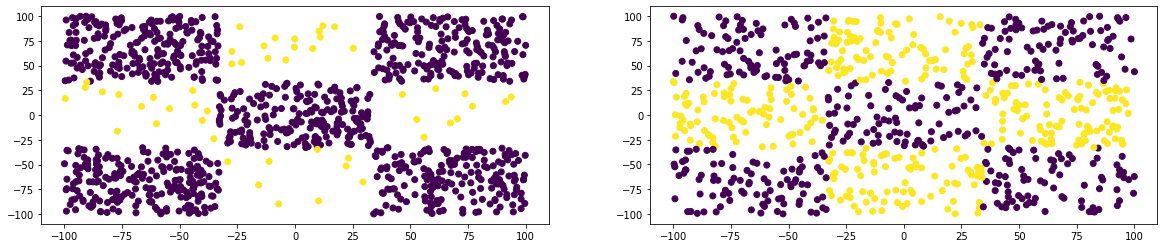

In [98]:
plt.figure(figsize=[20, 4])
plt.subplot(1, 2, 1)
plt.scatter(xor3_x_train[:, 0], xor3_x_train[:, 1], c=np.argmax(xor3_y_train, axis=1))
plt.subplot(1, 2, 2)
plt.scatter(xor3_x_test[:, 0], xor3_x_test[:, 1], c=np.argmax(xor3_y_test, axis=1))

In [ ]:
xor3_y_train

In [85]:
for i in range(0, 5):
    print(i)

    assert ~np.isnan(np.array(xor3_l2_nns[i].history['loss_train'])).any()

0
1
2
3
4


In [81]:
avg_loss_xor3_train_l2, avg_loss_xor3_test_l2 = average_loss([-1, xor3_l2_nns[0], xor3_l2_nns[1],  xor3_l2_nns[3]])

In [86]:
avg_loss_xor3_train_l2, avg_loss_xor3_test_l2 = average_loss(xor3_l2_nns)